<a href="https://colab.research.google.com/github/nlahri/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install piml

In [1]:
import pandas as pd
from piml import Experiment
from piml.models import XGB2Classifier

exp = Experiment()
data = pd.read_csv('https://github.com/shrutibalan4591/South-German-Credit-Risk-Classification/raw/main/Data/German_credit.csv')

exp.data_loader(data=data)
exp.data_summary(feature_exclude=["amount", "savings", "employment_duration", "personal_status_sex", "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker"], silent=True)
exp.data_prepare(target="credit_risk", task_type="classification", silent=True)

# Train Model without monotonicity
exp.model_train(model=XGB2Classifier(), name='XGB2')

# Train Model with monotonicity constraints on duration
exp.model_train(model=XGB2Classifier(mono_decreasing_list=("duration", )), name="Mono-XGB2")

(CVXPY) Jun 20 08:37:46 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 20 08:37:46 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [2]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Partial Dependance Plot

Partial dependance plot shows the linear relationship between predictors and the predicted values.

*   Status is directly proportional to creadit rating
*   Duration seems to be inversaly proportional over all but there are a lot of jitters
*   Credit history is again directly proportional. Seems people with longer history are more reliable for repayment
*   Purpose seems to have no linear relation with prediction for credit rating
*   Installment rate is inversaly proportional




HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

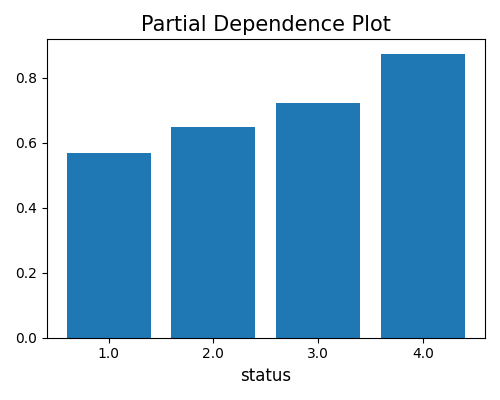

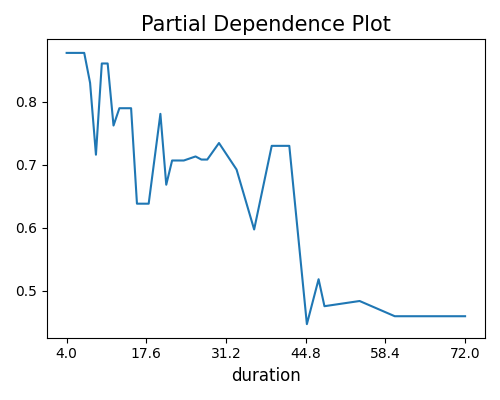

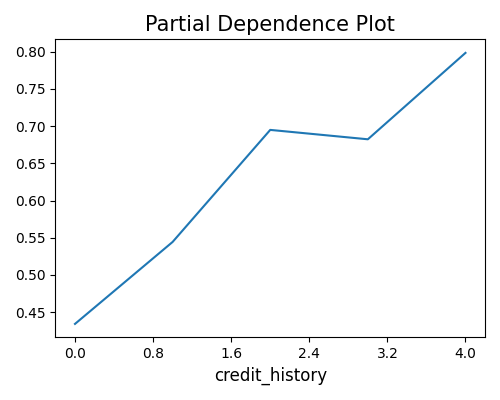

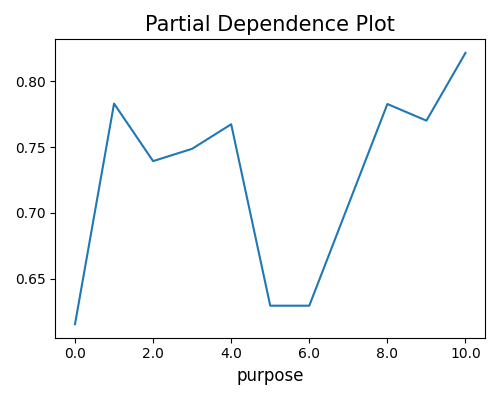

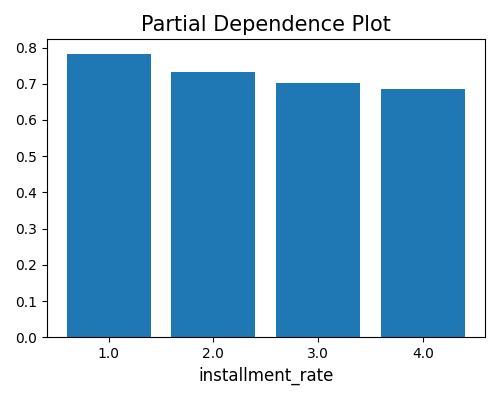

In [ ]:
#PDP for Model= XGB2
for col in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    exp.model_explain(model="XGB2", show="pdp", uni_feature=col, use_test=False,
                  grid_size=50, original_scale=True, figsize=(5, 4))

## PDP for Mono-XGB2

*   Everything is same as for the model XGB2
*   Only Duration shows clear inversly proportional relationship with responce. Which expected give the constraint on Monotonic with creating the model





HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

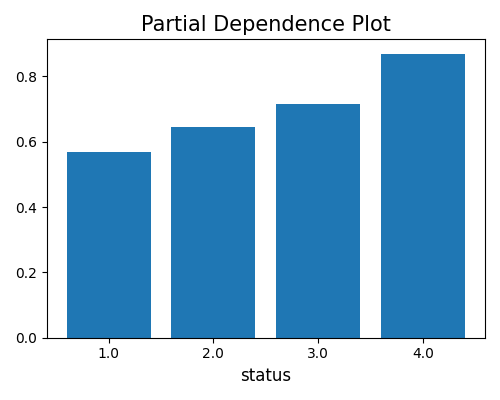

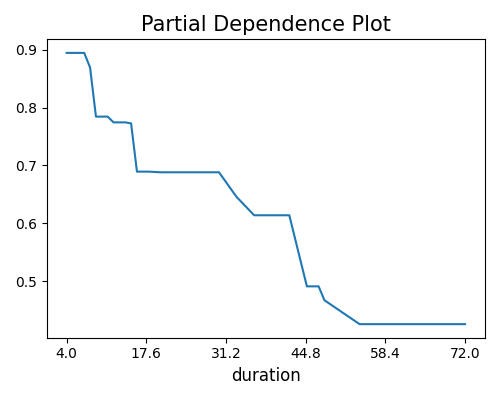

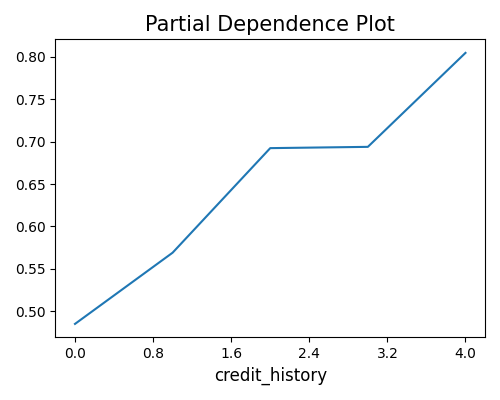

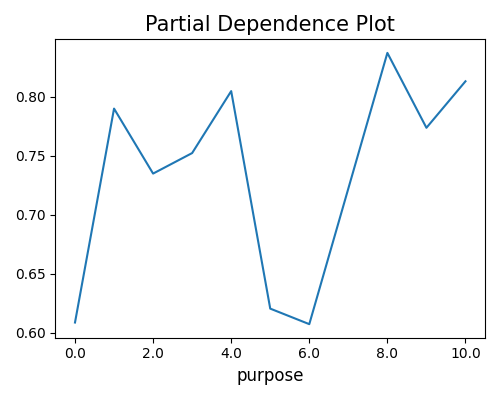

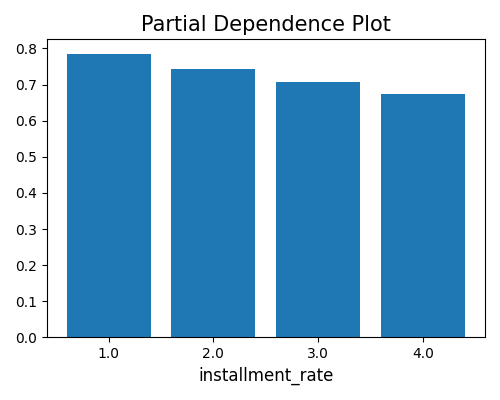

In [ ]:
#PDP for Model = Mono-XGB2
for col in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature=col, use_test=False,
                  grid_size=50, original_scale=True, figsize=(5, 4))

## PDP for bivariate

*   It clear from the colormap the none of the predictors is absolete, all of them are adding some information in the overall all prediction of the target for both models


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

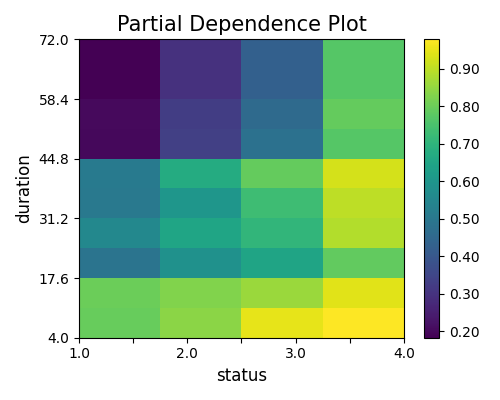

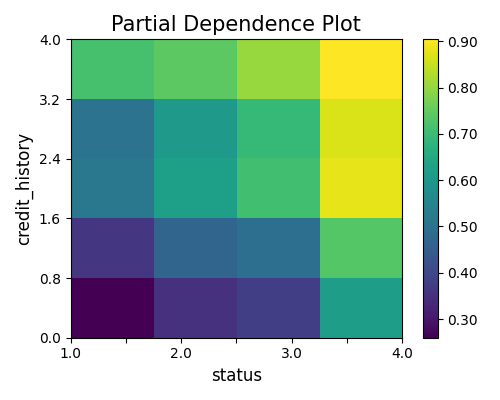

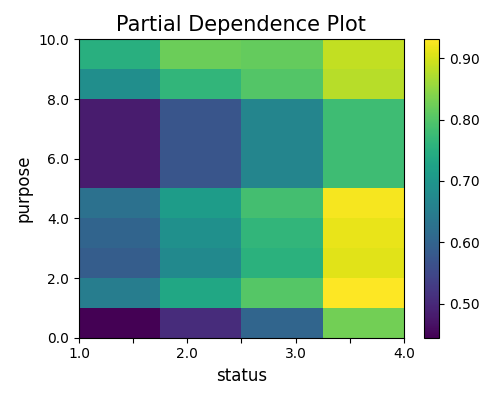

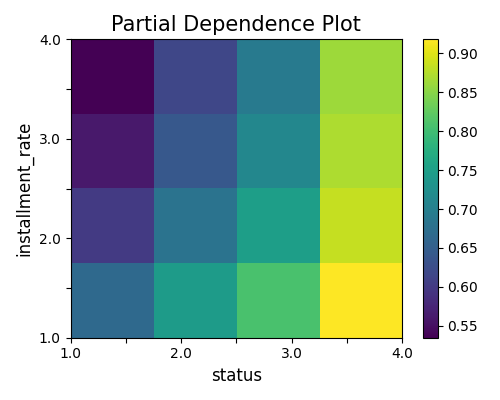

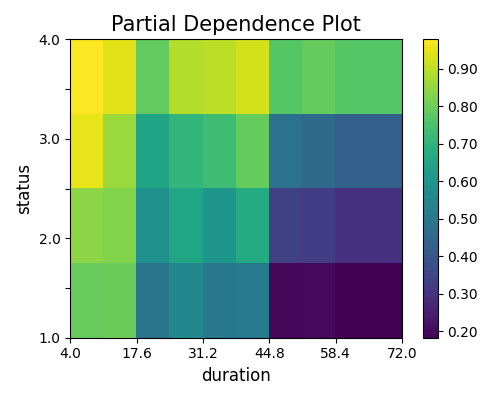

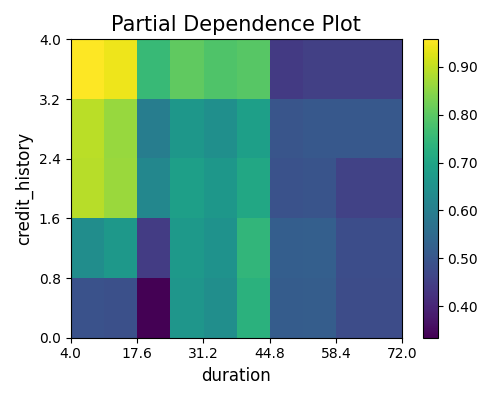

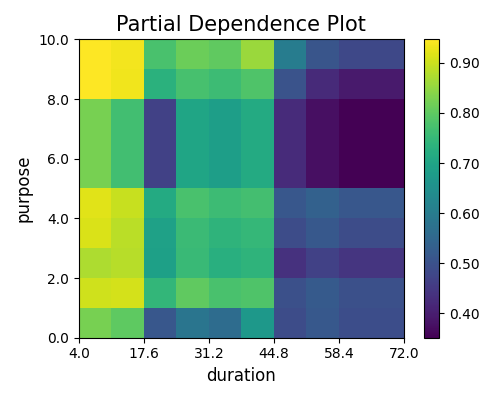

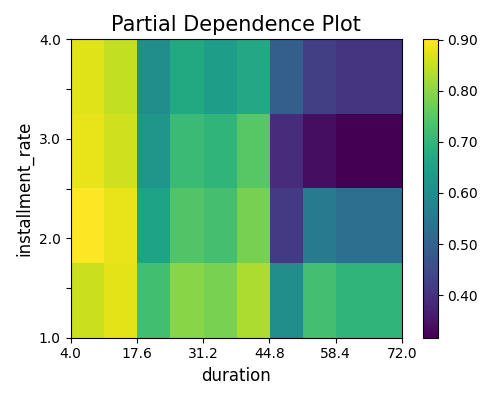

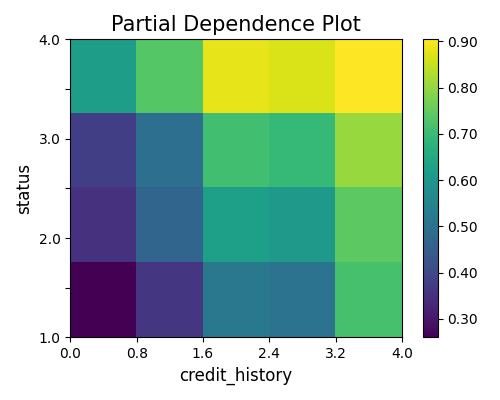

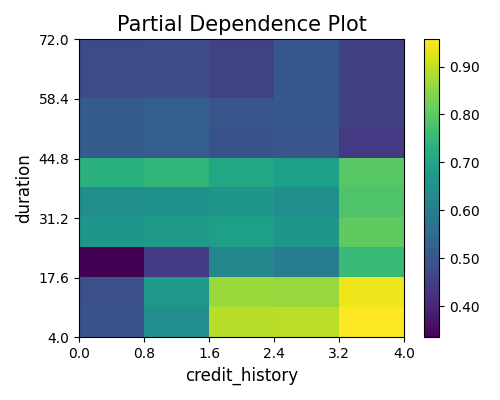

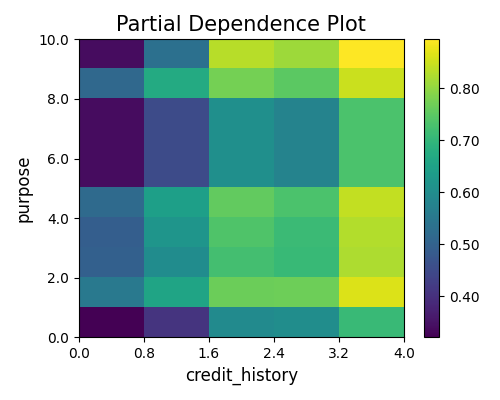

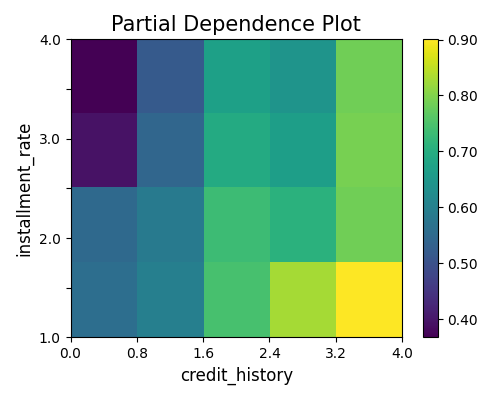

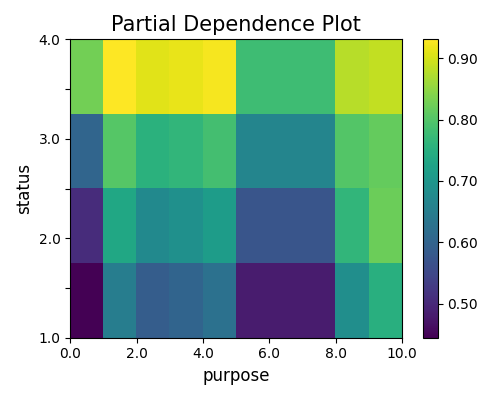

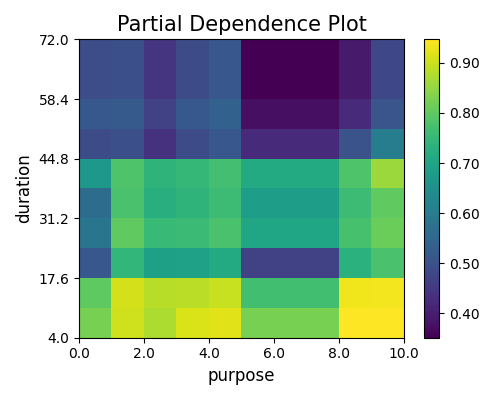

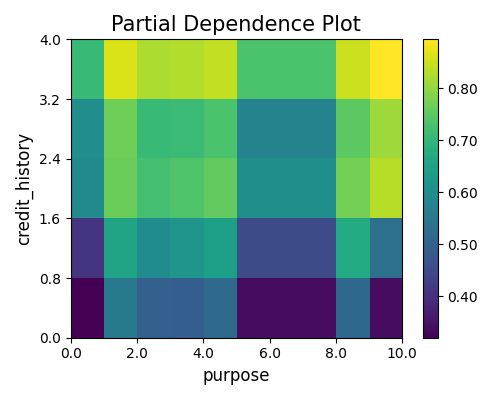

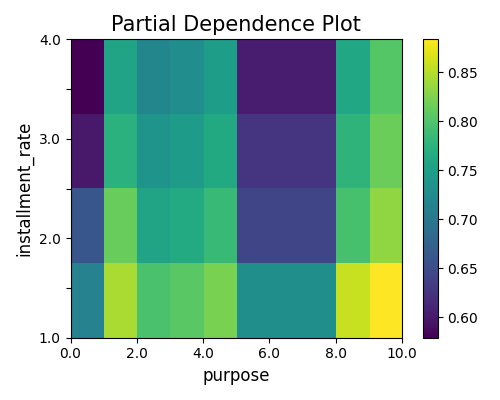

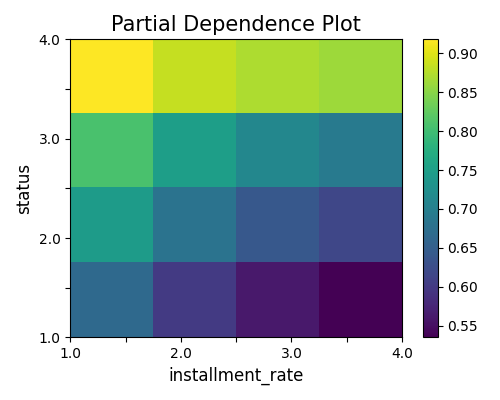

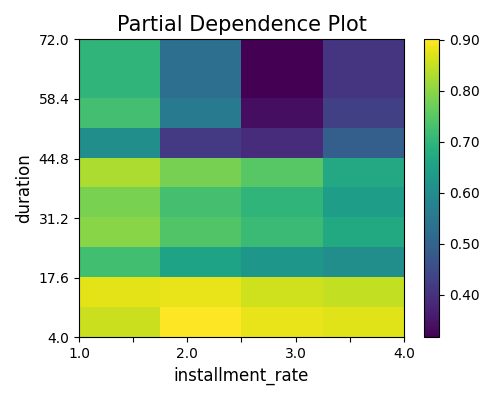

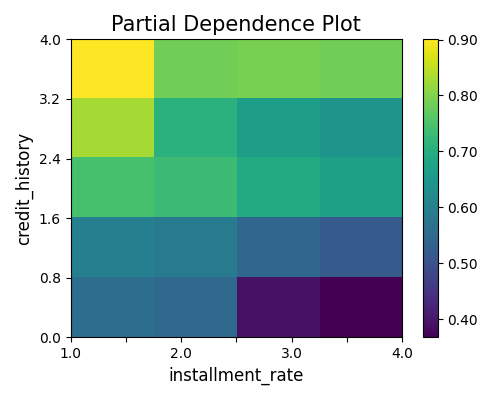

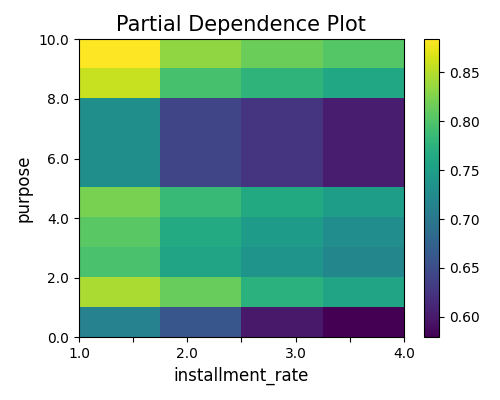

In [ ]:
for col1 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
  for col2 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    if col1 != col2:
      exp.model_explain(model="XGB2", show="pdp", bi_features=[col1,col2],
                  grid_size=10, sample_size=10000, sliced_line=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

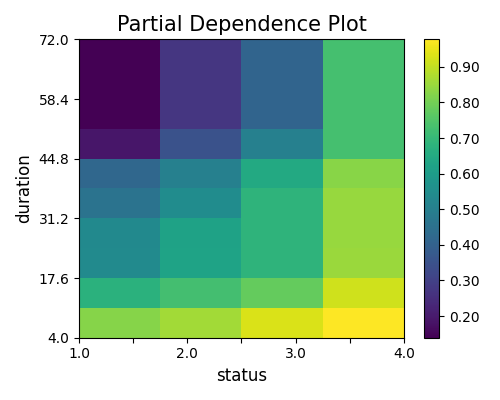

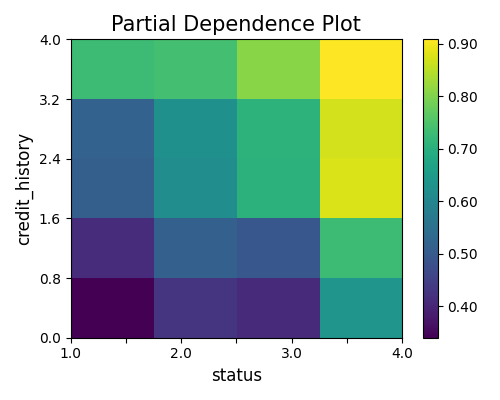

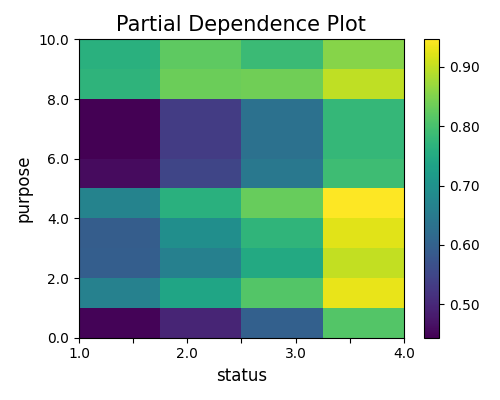

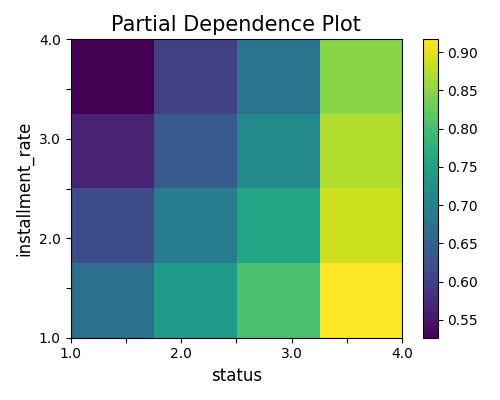

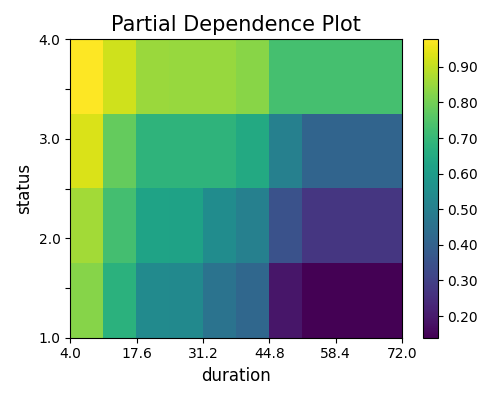

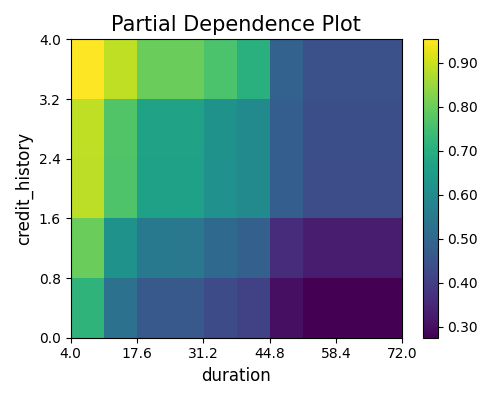

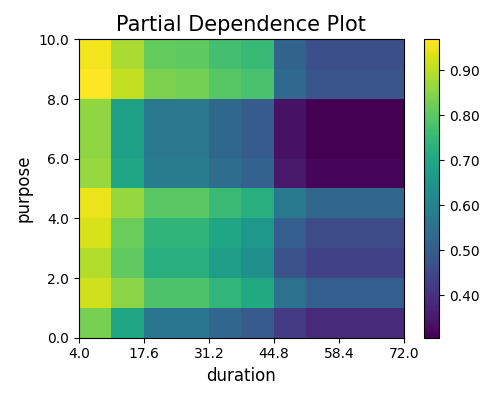

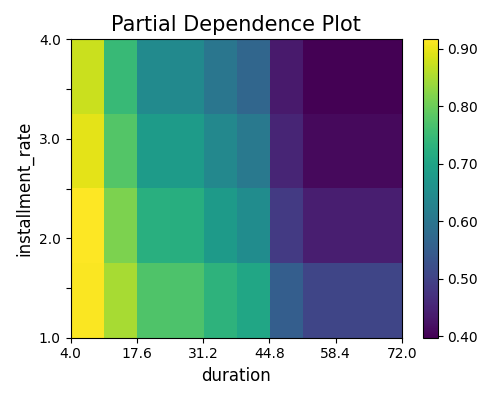

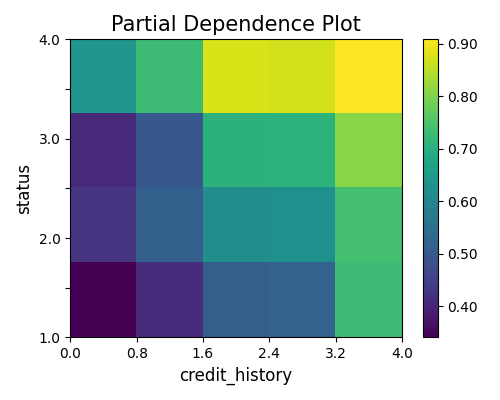

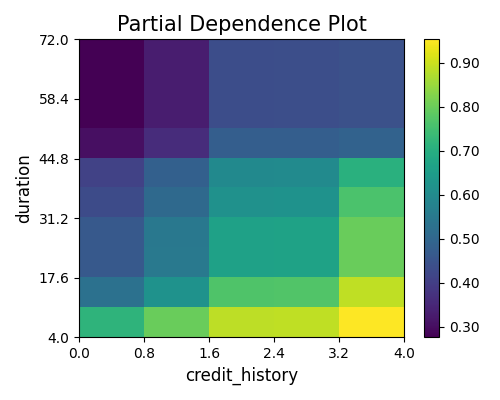

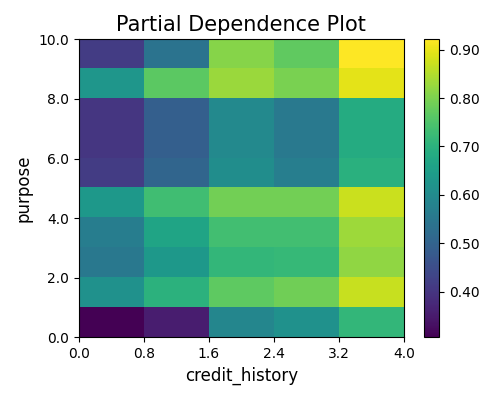

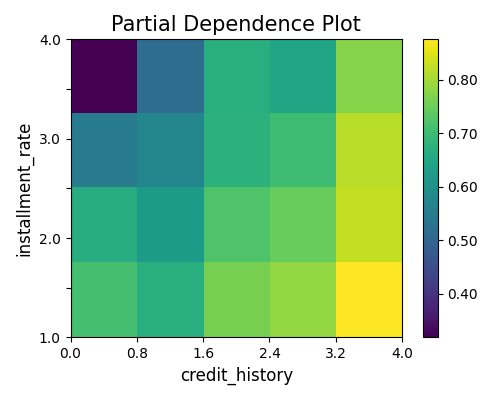

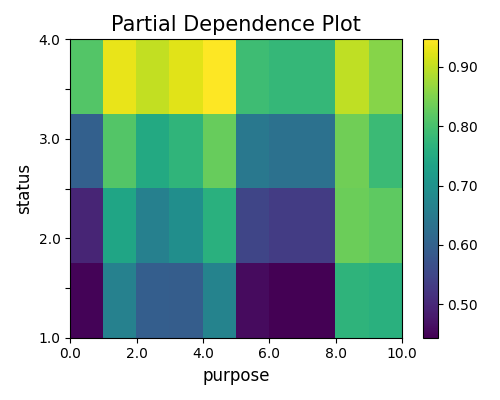

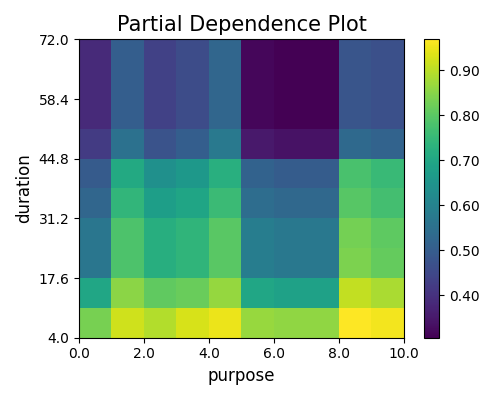

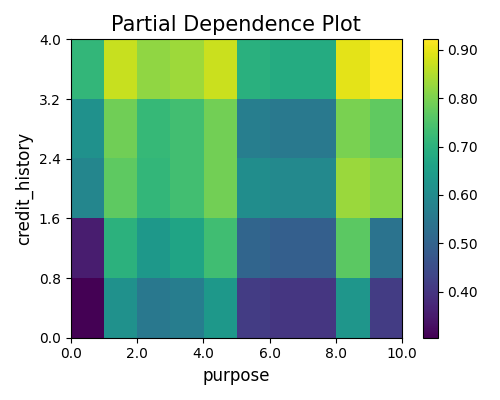

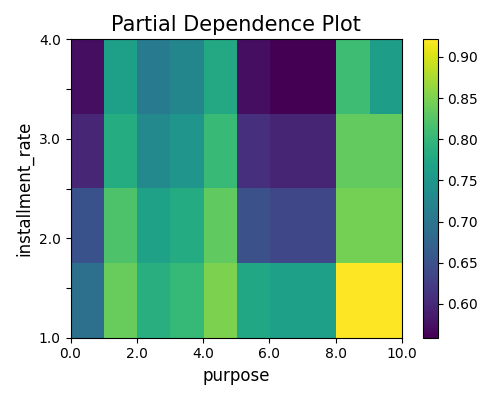

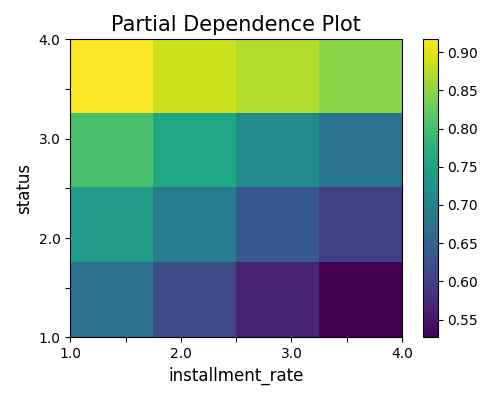

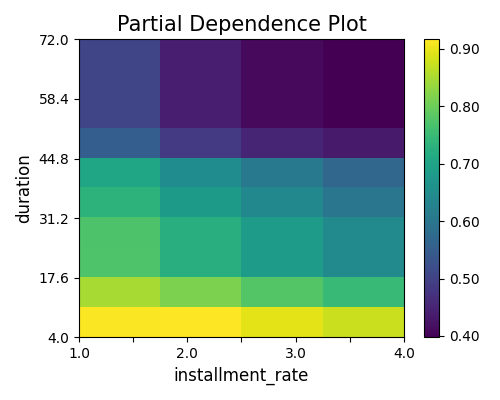

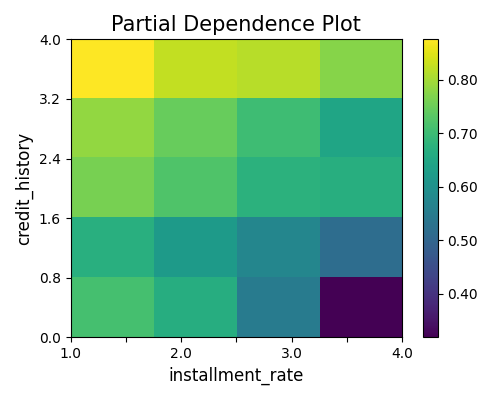

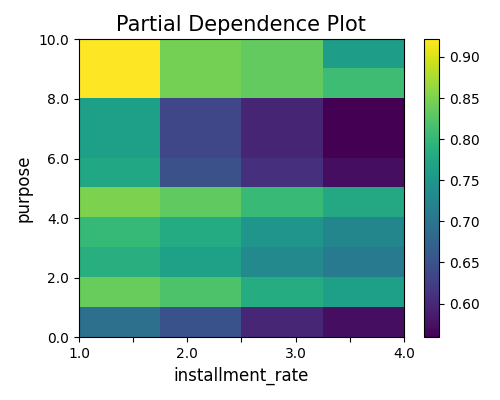

In [ ]:
for col1 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
  for col2 in ["status", "duration", "credit_history","purpose", "installment_rate"]:
    if col1 != col2:
      exp.model_explain(model="Mono-XGB2", show="pdp", bi_features=[col1,col2],
                  grid_size=10, sample_size=10000, sliced_line=False, original_scale=True, figsize=(5, 4))

# Outcome Testing



## Accucary, ROC Curve, Recall-Precision Curve


*   Mpno-XGB2 model is slightly better than the XGB2  model in the over all accuracy of the prediction. Both type 1 adn type 2 errors are less but we can not comment much from this alone.



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

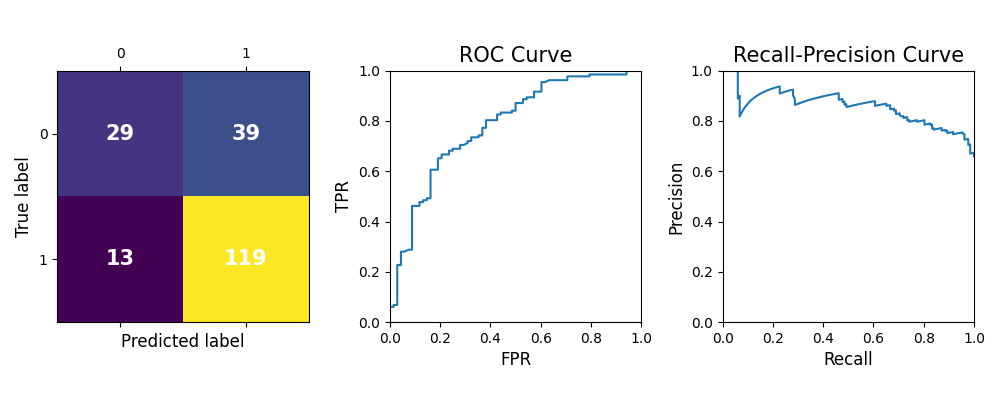

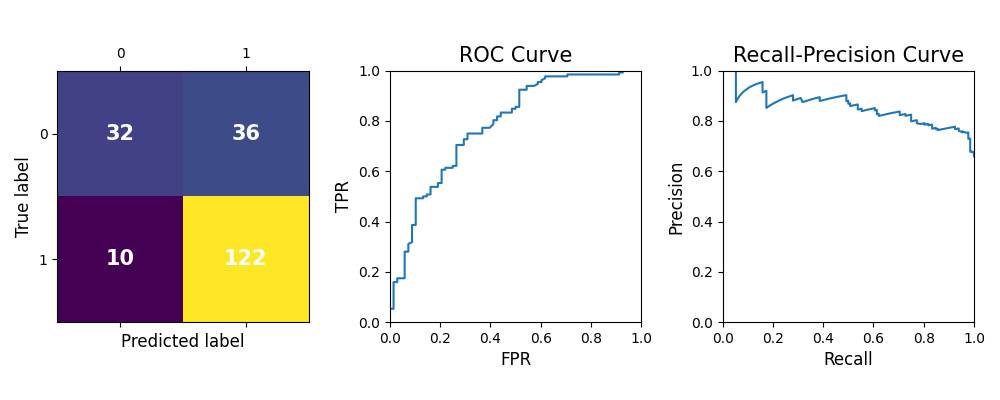

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_plot", figsize=(10, 4))
exp.model_diagnose(model="Mono-XGB2", show="accuracy_plot", figsize=(10, 4))


## Resedual plots

If resedual plots has a pattern it means we are missing some information needed to make an accutare prediction.


*   Status: As the status is increasing from 0 to 4, more and more observation are being classified as 1 or higher probability for class 1. And Hence the resedu for class 0 increased and class 1 reduced.

*   Duration: for lower and mid values of  duraion  resudual for class 0 is very high

* Credit history: opposite pattern for Duration is happning here, resedue for class 0 is increased with increase in the length of history. It means that as we have longer credit history more application are being misclassified as risky.


* Installment Rate; Miss classification is more for Class 0 throughout. It only indicate a conservative model.


Compare

Only for Duration thre is significant difference between the tso model
It seems Mono-XGB2 is slightly better in classifying class 0.


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

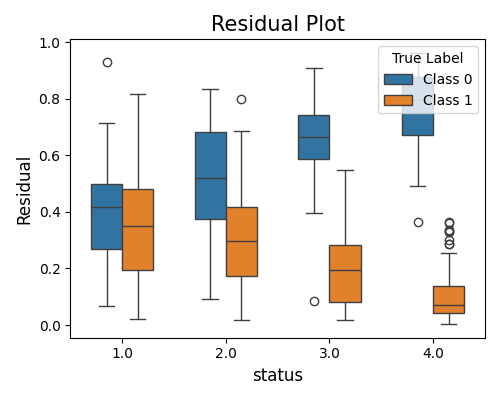

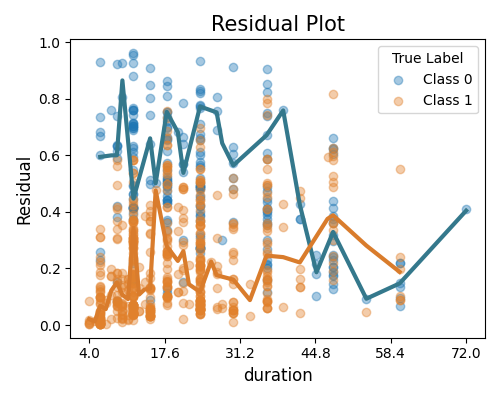

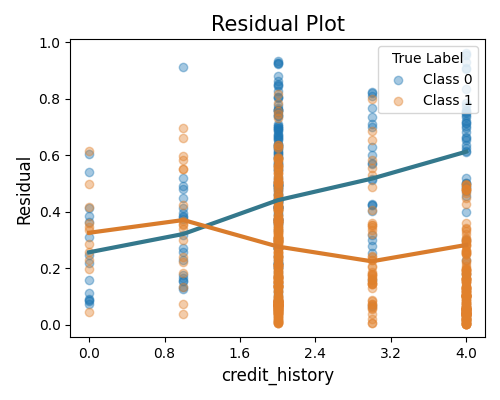

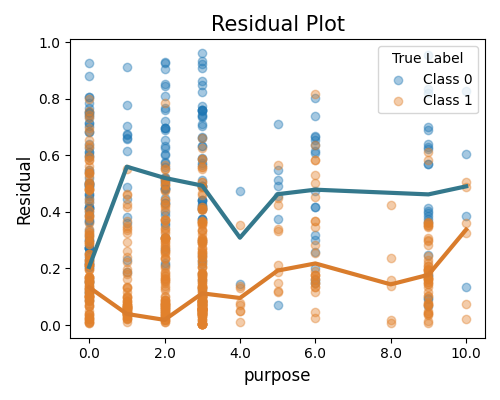

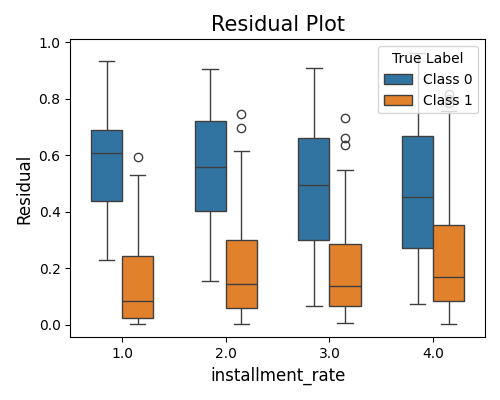

In [6]:
for col in ["status", "duration", "credit_history","purpose", "installment_rate"]:
  exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature=col,
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

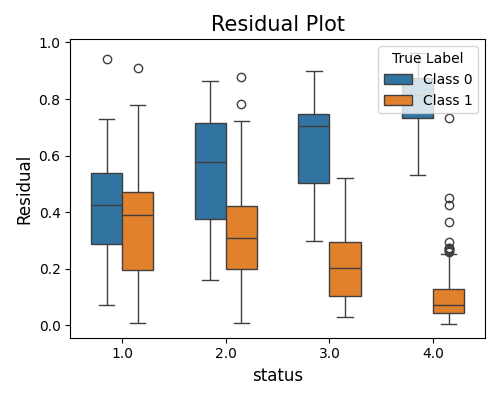

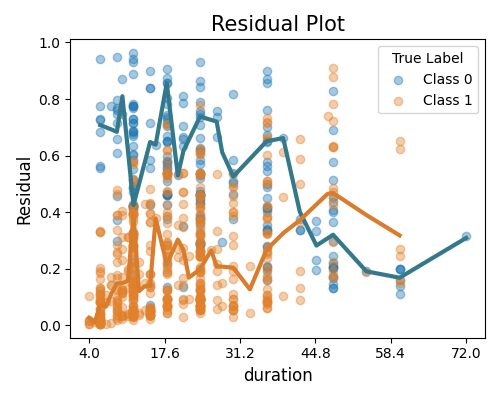

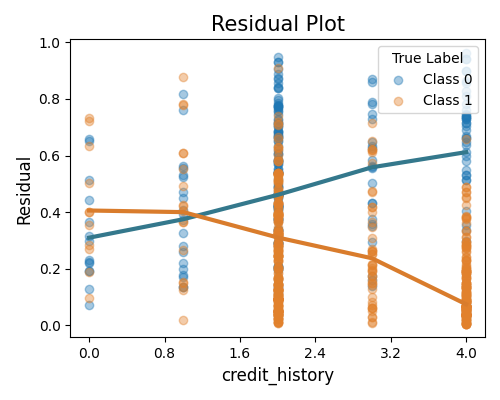

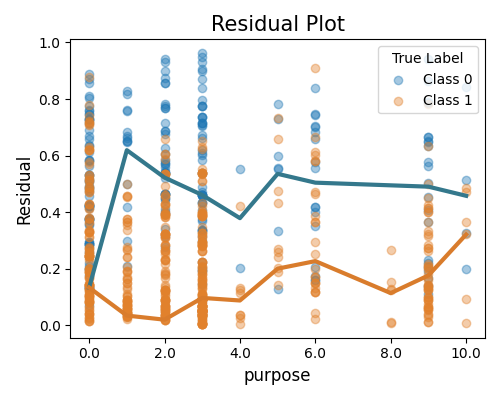

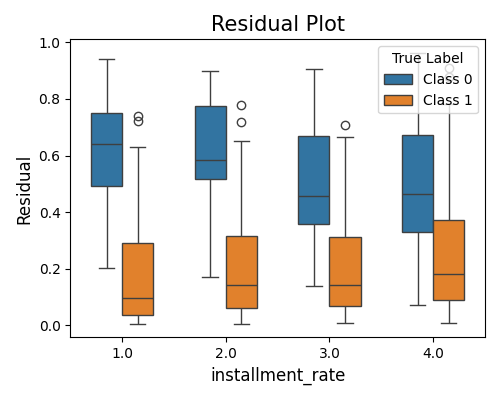

In [7]:
for col in ["status", "duration", "credit_history","purpose", "installment_rate"]:
  exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature=col,
                   use_test=False, original_scale=True, figsize=(5, 4))

## Weekspot
We are able to identify week reginon where the accucary falls beyond a perticula threshold. Its the when duration is 0.2-0.3 and 0.4-0.7

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

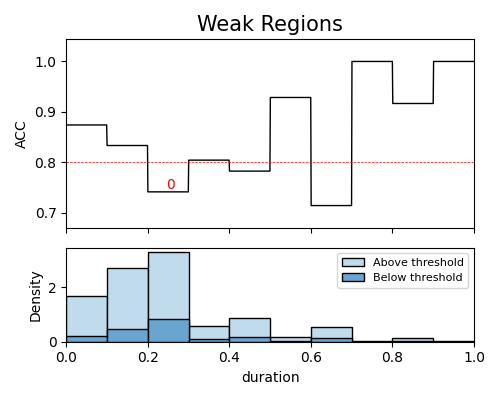

,[duration,duration),#Test,#Train,test_ACC,train_ACC,Gap
0,0.2,0.3,74,263,0.77027,0.741445,0.028825


In [12]:
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["duration"], threshold=1.0, min_samples=100,
                             return_data=True, figsize=(5, 4))
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

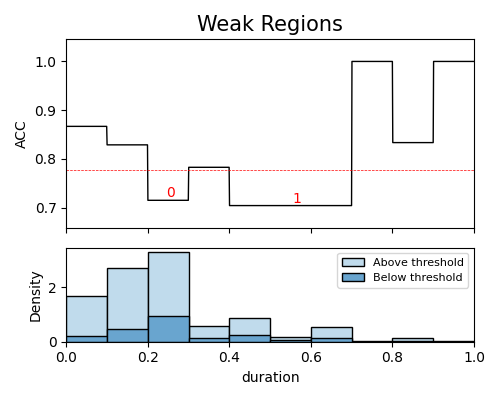

,[duration,duration),#Test,#Train,test_ACC,train_ACC,Gap
0,0.2,0.3,74,263,0.797297,0.714829,0.082468
1,0.4,0.7,32,125,0.687500,0.704000,-0.016500


In [17]:
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["duration"], threshold=1.0, min_samples=100,
                             return_data=True, figsize=(5, 4))
results.data

#Compare The model

Overall the model are not very different from each other. Having said that, Mono-XGB2 gives a better probabilty values for correct prediction of class 0. Hence Model 2, Mono-XGB2 should be prefered for production